## Problem Statement

### Customer churn prediction is to measure why customers are leaving a business. 

### Importing all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [2]:
df= pd.read_csv('churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2864,1564-HJUVY,Male,0,No,No,4,Yes,No,DSL,No,...,No,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),63.75,226.2,No
2673,8429-XIBUM,Male,0,No,No,22,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.35,2317.1,Yes
4399,3086-RUCRN,Female,0,No,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),103.10,6595,No
2016,8861-HGGKB,Female,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,86.45,830.85,Yes
1394,2272-JKMSI,Female,0,Yes,Yes,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,110.80,6840.95,No


In [3]:
# customerID won't provide any information for ML.
df.drop('customerID', axis=1, inplace= True) 

### Hypothesis Generation

#### Are the variables related to cost, billing, network, and service quality making a significant contribution towards a customer’s decision to stay with or leave the service provider?

#### T-test : To determine if there is a significant difference between the means of two groups or not.

#### Null Hypothesis: No relation in Predictor and Target variable. 
#### Alternate Hypothesis: There is a relation in Predictor and Target variable.

In [4]:
import scipy.stats as stats
_,p_value=stats.ttest_ind(df[df['Churn']=='Yes'].MonthlyCharges, df[df['Churn']=='No'].MonthlyCharges)

print(p_value)

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("Reject null hypothesis, There is a relation in Predictor and Target variable.")
else:
    print("Accept null hypothesis, No relation in Predictor and Target variable.")

2.706645606888261e-60
Reject null hypothesis, There is a relation in Predictor and Target variable.


### Descriptive Analytics:  Data Preparation

In [5]:
df[df.TotalCharges == ' '] # As these are blank values, I've dropped them.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df1= df[df.TotalCharges != ' ']
df1.TotalCharges= pd.to_numeric(df1.TotalCharges)
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
# Custom function to print unique categorical col values.
def cat_val(data):
    for col in data:
        if data[col].dtypes=='object':
            print(f'{col} : {data[col].unique()}')

In [8]:
cat_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


### Data Visualization

#### Univariate Analysis

Text(0.5, 1.0, 'gender Vs Churn')

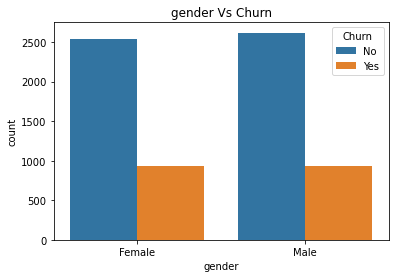

In [9]:
import seaborn as sns
sns.countplot('gender',data=df1,hue='Churn')
plt.title('gender Vs Churn')

Text(0.5, 1.0, 'InternetService Vs Churn')

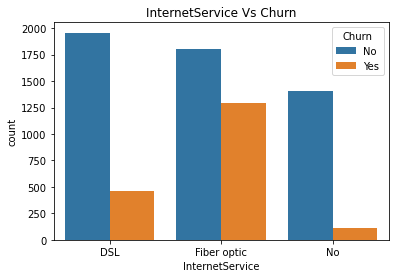

In [10]:
sns.countplot('InternetService',data=df1,hue='Churn')
plt.title('InternetService Vs Churn')

Text(0.5, 1.0, 'PhoneServive Vs Churn')

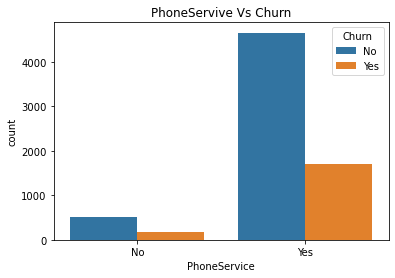

In [11]:
sns.countplot('PhoneService',data=df1,hue='Churn')
plt.title('PhoneServive Vs Churn')

### So people were not satisfied with the Fibre Optic and Phone service and that's why there exists a majority in the churn rate for those customers.

Text(0.5, 1.0, 'Contract Vs Churn')

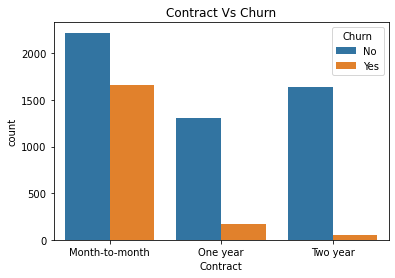

In [12]:
sns.countplot('Contract',data=df1,hue='Churn')
plt.title('Contract Vs Churn')

### So basically the customers with m-t-m billing are more likely to churn out because they have just a month, on the other hand churn rate for customers with longer contracts is very low.

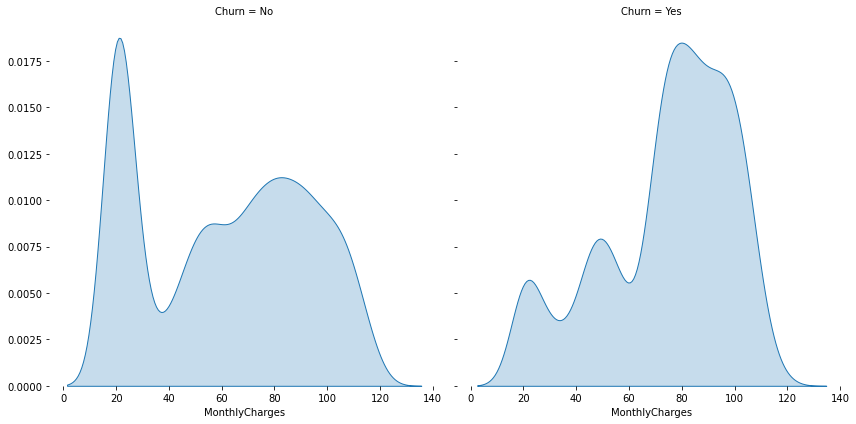

In [13]:
g= sns.FacetGrid(df1, col= 'Churn', height= 6)
g.map(sns.kdeplot, 'MonthlyCharges', shade= True) 
sns.despine(left= True, bottom= True)

###  The Churn rate is drastically increases as monthly charges increases.

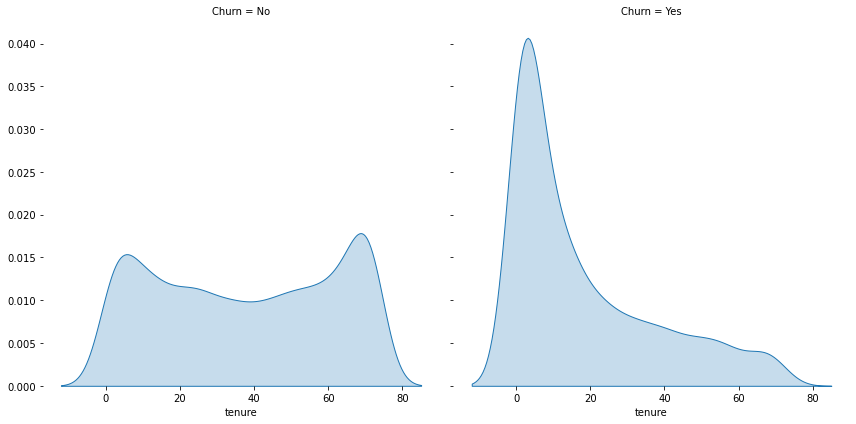

In [14]:
g= sns.FacetGrid(df1, col= 'Churn', height= 6)
g.map(sns.kdeplot, 'tenure', shade= True) 
sns.despine(left= True, bottom= True)

### So customers with highest tenure are not leaving our company, it means the Old Customer is more Loyal to the Company.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

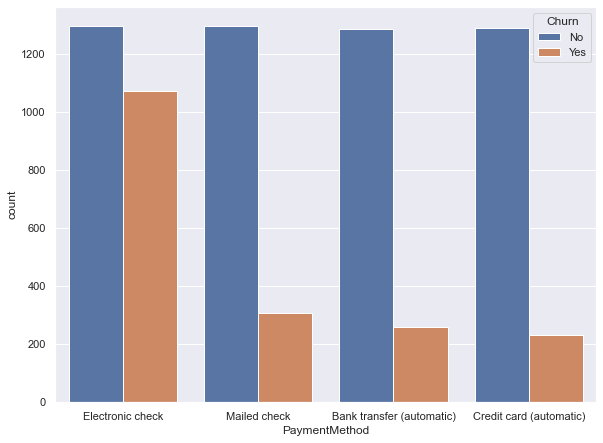

In [15]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9.7, 7.27)})
sns.countplot('PaymentMethod',data=df1,hue='Churn')

### Customers with the Payment Method of Electronic check are mostly to churn out.

In [16]:
# Some of the columns have no internet service or no phone service, that can be replaced with a simple No

df1.replace({'No phone service': 'No'}, inplace= True)
df1.replace({'No internet service': 'No'}, inplace= True)

Text(0.5, 1.0, 'tenure Vs Churn')

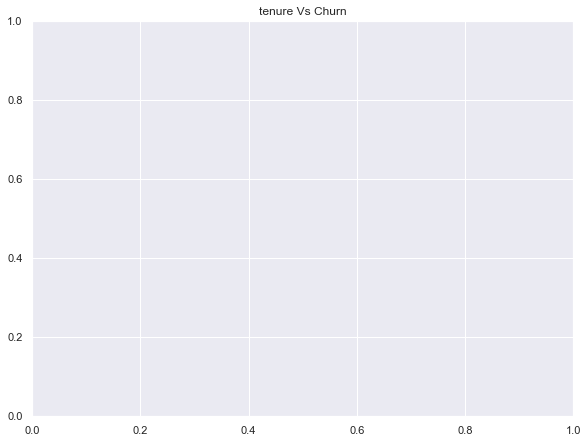

In [17]:
plt.title('tenure Vs Churn')

Text(0.5, 1.0, 'PaperlessBilling Vs Churn')

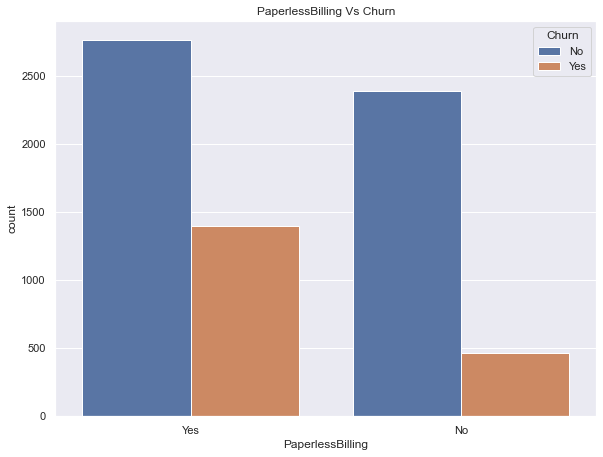

In [18]:
sns.countplot('PaperlessBilling',data=df1,hue='Churn')
plt.title('PaperlessBilling Vs Churn')

### Customers with the PaperlessBilling are mostly to churn out.

### Categorical columns

In [19]:
cols= ['InternetService','Contract','PaymentMethod']
df2= pd.get_dummies(data= df1, columns= cols)

df2['gender'].replace({'Female':1, 'Male':0}, inplace= True)

yes_no_columns= ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df2[col].replace({'Yes':1, 'No':0}, inplace= True)

<AxesSubplot:>

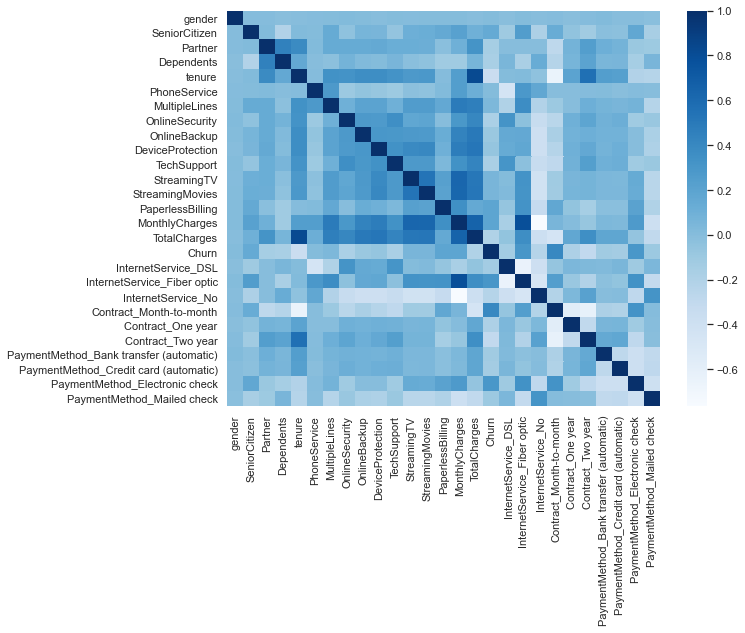

In [20]:
#We should handle the collinearity problem. This is because the presence of collinear variables always reduces the model’s performance since they introduce bias into the model.
#I have removed the highly correlated variables:
cm= df2.corr()
sns.heatmap(cm, xticklabels=cm.columns, yticklabels=cm.columns, cmap="Blues")

In [21]:
df3= df2.drop(['TotalCharges','Partner'],axis='columns')
df3.shape

(7032, 25)

#### Train test split

In [22]:
X = df3.drop('Churn',axis='columns')
X.shape

(7032, 24)

In [23]:
y = df3['Churn']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

In [25]:
# Let's scale the values

from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()

X_train= scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model= LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
predictions= model.predict(X_test)
    
print('Accuracy of Logistic Regression model is:', metrics.accuracy_score(y_test, predictions))
print('Error of Logistic Regression model is:', metrics.mean_squared_error(y_test, predictions))

Accuracy of Logistic Regression model is: 0.7590618336886994
Error of Logistic Regression model is: 0.24093816631130063


###  Prescriptive Analytics: Recommendations to improve performance

In [27]:
print(model.coef_, model.intercept_)

[[-0.02696699  0.08932944 -0.08236177 -0.81060129 -0.00796234  0.15053905
  -0.09420961  0.02450191  0.02041976 -0.0628408   0.18433354  0.26285329
   0.12512775 -0.52226447 -0.09990181  0.5741051  -0.57912457  0.29743366
  -0.02974652 -0.32002885 -0.05777505 -0.04257229  0.13291551 -0.05118228]] [-0.59792499]


In [28]:
# Calculating probabilities

import numpy as np

odds= np.exp(model.coef_)
Probability = odds/(1+odds)
Probability

array([[0.49325866, 0.52231752, 0.47942119, 0.30776238, 0.49800943,
        0.53756385, 0.476465  , 0.50612517, 0.50510476, 0.48429497,
        0.54595334, 0.56533756, 0.53124119, 0.37232288, 0.4750453 ,
        0.63970986, 0.35913406, 0.57381503, 0.49256392, 0.42066872,
        0.48556025, 0.48935853, 0.53318004, 0.48720722]])

In [30]:
pd.DataFrame(list(zip(X.columns, Probability[0])), columns=['Feature','Probability'])

,Feature,Probability
0,gender,0.493259
1,SeniorCitizen,0.522318
2,Dependents,0.479421
3,tenure,0.307762
4,PhoneService,0.498009
5,MultipleLines,0.537564
6,OnlineSecurity,0.476465
7,OnlineBackup,0.506125
8,DeviceProtection,0.505105
9,TechSupport,0.484295


#### Based on the probabilities and Hypothesis that I've generated the factors like 'Contract_Month-to-month', 'PaperlessBilling', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges' and 'MultipleLines' are highly signaficant.

#### The variables related to cost, billing, network, and service quality making a significant contribution towards a customer’s decision to stay with or leave the service provider.

#### So The Company should Improve their Internet Service(Optical Fibre) and Phone Service like Give customers cheaper plans than other competitors.As well as push schemes to m-t-m billing customers as they are more likely to switch networks.